<a href="https://colab.research.google.com/github/PiyushMi12/EDA/blob/main/Copy_of_IPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I have conducted a comprehensive EDA on the IPL dataset to gain insights into player performance, team dynamics, match outcomes, and other relevant aspects. The analysis should provide a deeper understanding of the patterns and trends that have emerged over the years.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/sample_data/IPL Dataset 2008 to 2023 - Sheet1.csv")



**THINGS TO DO**
1. Find Missing values
2. Explore about the numerical variables
3. Explore about catagorical variables.
4. Finding relationship between features









In [ ]:
#Finding The number of columns
df.columns

Index(['YEAR', 'POS', 'PLAYER', 'TEAM', 'MatCH', 'Inns', 'NO', 'Runs', 'HS',
       'out ', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s'],
      dtype='object')

In [ ]:
#finding null values
df.isnull().sum() #None in this case
#another way to find all the columns with nan values,can use heatmap to represent
[nan for nan in df.columns if df[nan].isna().sum()>1]

[]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    2341 non-null   int64  
 1   POS     2341 non-null   int64  
 2   PLAYER  2341 non-null   object 
 3   TEAM    2341 non-null   object 
 4   MatCH   2341 non-null   int64  
 5   Inns    2341 non-null   int64  
 6   NO      2341 non-null   int64  
 7   Runs    2341 non-null   int64  
 8   HS      2341 non-null   object 
 9   out     2341 non-null   object 
 10  Avg     2341 non-null   object 
 11  BF      2341 non-null   int64  
 12  SR      2341 non-null   float64
 13  100     2341 non-null   int64  
 14  50      2341 non-null   int64  
 15  4s      2341 non-null   int64  
 16  6s      2341 non-null   int64  
dtypes: float64(1), int64(11), object(5)
memory usage: 311.0+ KB


In [ ]:
df.head(5)

,YEAR,POS,PLAYER,TEAM,MatCH,Inns,NO,Runs,HS,out,Avg,BF,SR,100,50,4s,6s
0,2008,1,Shaun Marsh,PBKS,11,11,2,616,115,OUT,68.44,441,139.68,1,5,59,26
1,2008,2,Gautam Gambhir,DC,14,14,1,534,86,OUT,41.07,379,140.89,0,5,68,8
2,2008,3,Sanath Jayasuriya,MI,14,14,2,518,114*,NOT OUT,43.16,309,167.63,1,2,58,31
3,2008,4,Shane Watson,RR,15,15,5,472,76*,NOT OUT,47.2,311,151.76,0,4,47,19
4,2008,5,Graeme Smith,RR,11,11,2,441,91,OUT,49,362,121.82,0,3,54,8


In [ ]:
#Finding how many players played till date
total_players=df.shape[0]
print(total_players)

2341


In [ ]:
#How many players played  for each team
Teams=df.TEAM.value_counts().index
Players=df.TEAM.value_counts().values
Teams

Index(['RCB', 'PBKS', 'KKR', 'DC', 'MI', 'RR', 'CSK', 'SRH', 'DEC', 'PWI',
       'RPS', 'GL', 'LSG', 'GT', 'KTK'],
      dtype='object')

<function matplotlib.pyplot.clf()>

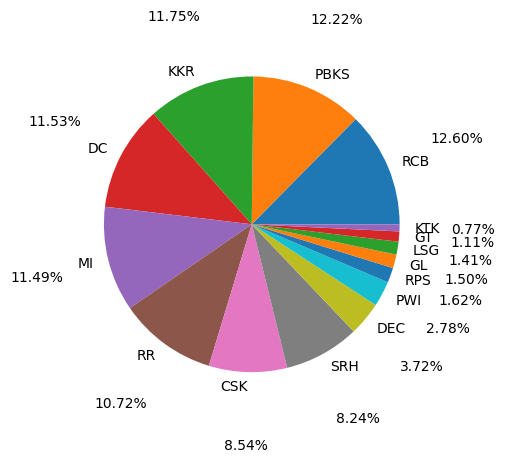

In [ ]:
#PIE CHART
plt.pie(Players,labels=Teams,autopct="%1.2f%%",pctdistance=1.5)
plt.clf
#for top3 teams playerwise use slicing
# plt.pie(Players[:3],labels=Teams[:3])

**OBSERVATIONS**
*   RCB has the most players debuted in the history.
* Then come PBKS and KKR

In [ ]:
#MAXIMUM RUNS SCORED BY A BATSMAN IN A SEASON[TOP-5]
sorted_df=df
sorted_df.sort_values(by="Runs",ascending=False)
sorted_df[:5]


,YEAR,POS,PLAYER,TEAM,MatCH,Inns,NO,Runs,HS,out,Avg,BF,SR,100,50,4s,6s
0,2008,1,Shaun Marsh,PBKS,11,11,2,616,115,OUT,68.44,441,139.68,1,5,59,26
1,2008,2,Gautam Gambhir,DC,14,14,1,534,86,OUT,41.07,379,140.89,0,5,68,8
2,2008,3,Sanath Jayasuriya,MI,14,14,2,518,114*,NOT OUT,43.16,309,167.63,1,2,58,31
3,2008,4,Shane Watson,RR,15,15,5,472,76*,NOT OUT,47.2,311,151.76,0,4,47,19
4,2008,5,Graeme Smith,RR,11,11,2,441,91,OUT,49,362,121.82,0,3,54,8


**Which Player scored highest runs in a season
and plays for which team and  his total runs**

In [ ]:
d=df.Runs.idxmax() #index of max value in a column
s=df.iloc[d] #getting its row information
s[["TEAM","Runs"]] #getting info of that series

TEAM    RCB
Runs    973
Name: 1170, dtype: object

In [ ]:
df[df["YEAR"]==2023]

,YEAR,POS,PLAYER,TEAM,MatCH,Inns,NO,Runs,HS,out,Avg,BF,SR,100,50,4s,6s
2175,2023,1,Shubman Gill,GT,17,17,2,890,129,OUT,59.33,564,157.80,3,4,85,33
2176,2023,2,Faf Du Plessis,RCB,14,14,1,730,84,OUT,56.15,475,153.68,0,8,60,36
2177,2023,3,Devon Conway,CSK,16,15,2,672,92*,NOT OUT,51.69,481,139.70,0,6,77,18
2178,2023,4,Virat Kohli,RCB,14,14,2,639,101*,NOT OUT,53.25,457,139.82,2,6,65,16
2179,2023,5,Yashasvi Jaiswal,RR,14,14,1,625,124,OUT,48.08,382,163.61,1,5,82,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,2023,162,Mohammed Siraj,RCB,14,2,1,1,1*,NOT OUT,1,2,50.00,0,0,0,0
2337,2023,163,Yudhvir Singh,LSG,3,2,0,1,1,OUT,0.5,2,50.00,0,0,0,0
2338,2023,164,Fazalhaq Farooqi,SRH,4,1,1,1,1*,NOT OUT,-,5,20.00,0,0,0,0
2339,2023,165,Nathan Ellis,PBKS,10,2,0,1,1,OUT,0.5,7,14.28,0,0,0,0


In [ ]:
##CSK Players batting average in 2022
D=df[df["YEAR"]==2023]
df.groupby(df[df["YEAR"]==2023]["TEAM"]).size()

TEAM
CSK     11
DC      22
GT      13
KKR     16
LSG     19
MI      17
PBKS    16
RCB     19
RR      14
SRH     19
dtype: int64

In [ ]:
a=D.groupby("TEAM")

In [ ]:
d=a.get_group("CSK")
d

,YEAR,POS,PLAYER,TEAM,MatCH,Inns,NO,Runs,HS,out,Avg,BF,SR,100,50,4s,6s
2177,2023,3,Devon Conway,CSK,16,15,2,672,92*,NOT OUT,51.69,481,139.70,0,6,77,18
2181,2023,7,Ruturaj Gaikwad,CSK,16,15,1,590,92,OUT,42.14,400,147.50,0,4,46,30
2187,2023,13,Shivam Dube,CSK,16,14,3,418,52,OUT,38,264,158.33,0,3,12,35
2203,2023,29,Ajinkya Rahane,CSK,14,11,1,326,71*,NOT OUT,32.6,189,172.48,0,2,24,16
2225,2023,51,Ravindra Jadeja,CSK,16,12,4,190,25*,NOT OUT,23.75,133,142.85,0,0,11,9
2231,2023,57,Ambati Rayudu,CSK,16,12,2,158,27*,NOT OUT,15.8,113,139.82,0,0,10,9
2240,2023,66,Moeen Ali,CSK,15,10,3,124,23,OUT,17.71,91,136.26,0,0,12,6
2247,2023,73,MS Dhoni,CSK,16,12,8,104,32*,NOT OUT,26,57,182.45,0,0,3,10
2298,2023,124,Ben Stokes,CSK,2,2,0,15,8,OUT,7.5,14,107.14,0,0,2,0
2326,2023,152,Mitchell Santner,CSK,3,2,2,2,1*,NOT OUT,-,4,50.00,0,0,0,0


<function matplotlib.pyplot.clf()>

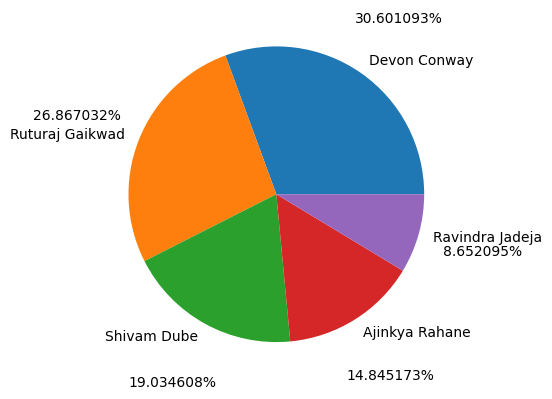

In [ ]:
#TOP 5 Runs getter of CSK in 2023
plt.pie(d["Runs"][:5],labels=d["PLAYER"][:5],autopct="%5f%%",pctdistance=1.45)
plt.clf

**TOP RUN SCORER OF EACH SEASON**

In [ ]:
#ORANGE CAP
Y_Performance= df.groupby("YEAR")["Runs"].idxmax()
df.loc[Y_Performance]

,YEAR,POS,PLAYER,TEAM,MatCH,Inns,NO,Runs,HS,out,Avg,BF,SR,100,50,4s,6s
0,2008,1,Shaun Marsh,PBKS,11,11,2,616,115,OUT,68.44,441,139.68,1,5,59,26
150,2009,1,Matthew Hayden,CSK,12,12,1,572,89,OUT,52,395,144.81,0,5,60,22
280,2010,1,Sachin Tendulkar,MI,15,15,2,618,89*,NOT OUT,47.53,466,132.61,0,5,86,3
433,2011,1,Chris Gayle,RCB,12,12,3,608,107,OUT,67.55,332,183.13,2,3,57,44
594,2012,1,Chris Gayle,RCB,15,14,2,733,128*,NOT OUT,61.08,456,160.74,1,7,46,59
751,2013,1,Michael Hussey,CSK,17,17,3,733,95,OUT,52.35,566,129.50,0,6,81,17
909,2014,1,Robin Uthappa,KKR,16,16,1,660,83*,NOT OUT,44,479,137.78,0,5,74,18
1041,2015,1,David Warner,SRH,14,14,1,562,91,OUT,43.23,359,156.54,0,7,65,21
1170,2016,1,Virat Kohli,RCB,16,16,4,973,113,OUT,81.08,640,152.03,4,7,83,38
1306,2017,1,David Warner,SRH,14,14,3,641,126,OUT,58.27,452,141.81,1,4,63,26


In [ ]:
#MOST NO OF ORANGE CAPS
df.loc[Y_Performance]["PLAYER"].value_counts()

David Warner        3
Chris Gayle         2
Shaun Marsh         1
Matthew Hayden      1
Sachin Tendulkar    1
Michael Hussey      1
Robin Uthappa       1
Virat Kohli         1
Kane Williamson     1
KL Rahul            1
Ruturaj Gaikwad     1
Jos Buttler         1
Shubman Gill        1
Name: PLAYER, dtype: int64

**DAVID WARNER has most number of orange caps.He top scored for 3 seasons**

**INDIVIDUAL PERFORMANCES**

In [ ]:
#HIGHEST RUN GETTER IN A SINGLE MATCH IN THE HISTORY
df["HIGH_SCORE"]=df["HS"].apply(lambda x : x.replace("*",""))
df['HIGH_SCORE'] = pd.to_numeric(df['HIGH_SCORE'], errors='coerce')
C=df.iloc[df["HIGH_SCORE"].idxmax()]

print(f"{C.PLAYER} scored {C.HS} Runs in year {C.YEAR}")

Chris Gayle scored 175* Runs in year 2013


**Chris Gayle scored 175* Runs in year 2013**

**Which teams have the most consistent or highest-scoring batters?**

In [ ]:
df.iloc[Y_Performance]["TEAM"].value_counts()

SRH     4
CSK     3
RCB     3
PBKS    2
MI      1
KKR     1
RR      1
GT      1
Name: TEAM, dtype: int64

**SRH Has most consistent batters in the history**

**Who has the highest career strike rate among batters with a minimum number of matches?**

In [ ]:
df.iloc[df["SR"].idxmax()]

YEAR                   2012
POS                     147
PLAYER        Syed Mohammad
TEAM                    RCB
MatCH                     2
Inns                      1
NO                        1
Runs                      4
HS                       4*
out                 NOT OUT
Avg                       0
BF                        1
SR                    400.0
100                       0
50                        0
4s                        1
6s                        0
HIGH_SCORE                4
Name: 740, dtype: object

**SYED MOHAMMAD has the highest strike rate(across  seasons)**

<ipython-input-142-b57aab2262c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='YEAR', y='Runs', data=df, palette='Set2')


<Axes: xlabel='YEAR', ylabel='Runs'>

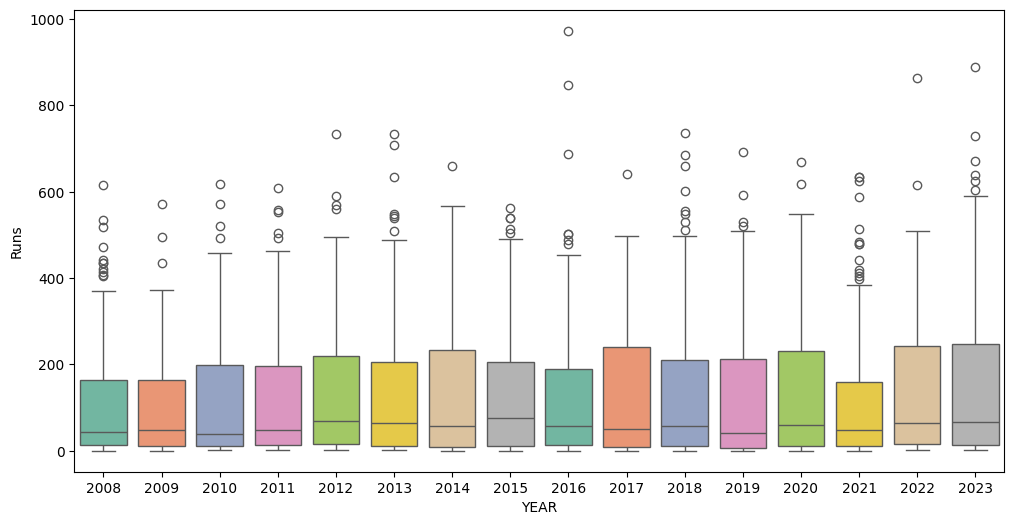

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='YEAR', y='Runs', data=df, palette='Set2')

In [ ]:
Season=df.groupby("YEAR")
Season.get_group(2008)

,YEAR,POS,PLAYER,TEAM,MatCH,Inns,NO,Runs,HS,out,Avg,BF,SR,100,50,4s,6s,HIGH_SCORE
0,2008,1,Shaun Marsh,PBKS,11,11,2,616,115,OUT,68.44,441,139.68,1,5,59,26,115
1,2008,2,Gautam Gambhir,DC,14,14,1,534,86,OUT,41.07,379,140.89,0,5,68,8,86
2,2008,3,Sanath Jayasuriya,MI,14,14,2,518,114*,NOT OUT,43.16,309,167.63,1,2,58,31,114
3,2008,4,Shane Watson,RR,15,15,5,472,76*,NOT OUT,47.2,311,151.76,0,4,47,19,76
4,2008,5,Graeme Smith,RR,11,11,2,441,91,OUT,49,362,121.82,0,3,54,8,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2008,146,Paidikalva Vijaykumar,DEC,9,2,2,1,1*,NOT OUT,0,1,100.00,0,0,0,0,1
146,2008,147,Abdur Razzak,RCB,1,1,1,0,0*,NOT OUT,0,2,0.00,0,0,0,0,0
147,2008,148,Abhinav Mukund,CSK,2,1,0,0,0*,NOT OUT,0,1,0.00,0,0,0,0,0
148,2008,149,Lakshmipathy Balaji,CSK,9,1,0,0,0*,NOT OUT,0,4,0.00,0,0,0,0,0


**Centuries and Half centuries scored in 2023 in pie chart**

In [ ]:
c=Season.get_group(2023)
c.sort_values("100",ascending =False,inplace=True)


<ipython-input-170-bfa341d4da64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.sort_values("100",ascending =False,inplace=True)


<function matplotlib.pyplot.clf()>

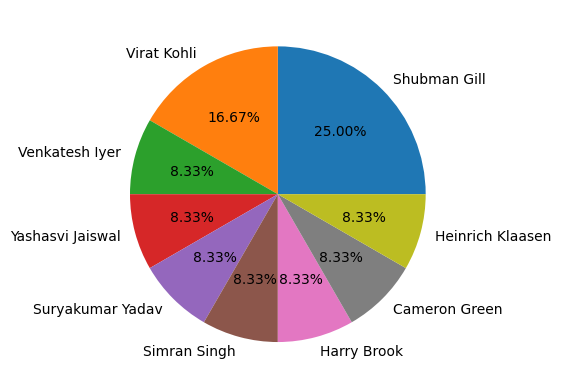

In [ ]:
#100 distribution in 2023
plt.pie(c["100"][:9],labels=c["PLAYER"][:9],autopct="%1.2f%%")
plt.clf

**MAXIMUM NUMBER OF NOT-OUTS SEASON WISE**

In [ ]:
s=df.groupby("YEAR")["out "].value_counts()
not_out_counts_per_year = s.xs('NOT OUT', level=1)
not_out_counts_per_year.idxmax()

2020

**2020 has the maximum number of notouts in a season**